<a href="https://colab.research.google.com/github/nathasha-naranpanawa/COMP4702_2024/blob/main/PracW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load preferred dataset
fd1 = '/home/jack/COMP4702_repo/Practicals/Practical_w11/diabetes.csv'
fd2 = '/home/jack/COMP4702_repo/Practicals/Practical_w11/ionosphere.csv'
fd3 = '/home/jack/COMP4702_repo/Practicals/Practical_w11/sonar.csv'

df = pd.read_csv(fd1)

In [9]:
from sklearn.model_selection import train_test_split

# Extract features (columns 1-8) and labels (column 9)
X = df.iloc[:, 0:8].values  # Features
y = df.iloc[:, 8].values    # Labels

# Shuffle and split the data
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Q1

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# TODO: Train an SVM on the above data using a linear kernel and set parameter C = 1
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Q2

In [15]:
# TODO: make predictions on train and hold out sets with trained SVM
y_pred_train = svm.predict(X_train)
y_pred_holdout = svm.predict(X_holdout)

# TODO: Record the classification accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
print("Train accuracy:", train_accuracy*100.00)
print("Holdout accuracy:", holdout_accuracy*100)

# TODO: Show confusion matrices
train_confusion_matrix = confusion_matrix(y_train, y_pred_train)
holdout_confusion_matrix = confusion_matrix(y_holdout, y_pred_holdout)
print("Train confusion matrix:")
print(train_confusion_matrix)
print("Holdout confusion matrix:")
print(holdout_confusion_matrix)

Train accuracy: 77.36156351791531
Holdout accuracy: 75.32467532467533
Train confusion matrix:
[[356  45]
 [ 94 119]]
Holdout confusion matrix:
[[80 19]
 [19 36]]


# Q3

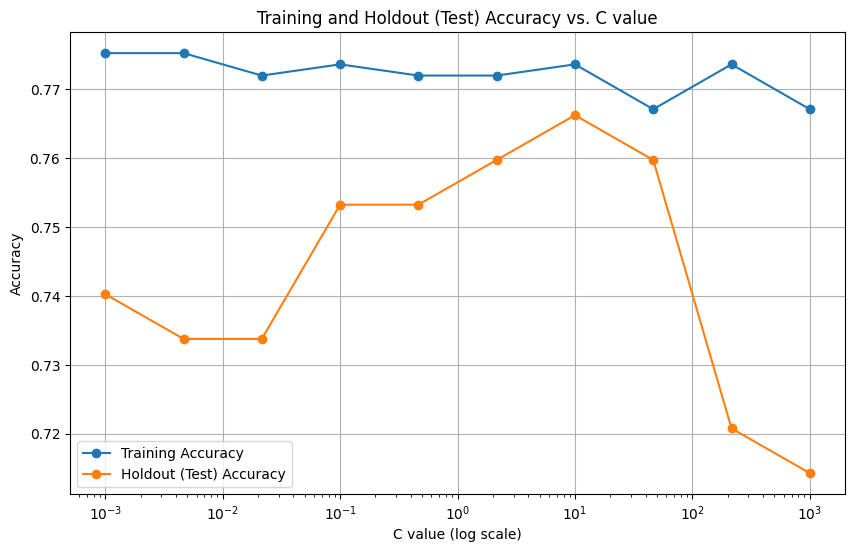

In [16]:
# Vary the C parameter on a logarithmic scale, and show how it influences the training

# TODO: Create a list of C values on logarithmic scale to try
C_values = np.logspace(-3, 3, 10)

# TODO: Train and evaluate a model for each C value
train_accuracy_list = []
holdout_accuracy_list = []

for C in C_values:
  # TODO: train SVM
  svm = SVC(kernel='linear', C=C)
  svm.fit(X_train, y_train)
  
  # TODO: Predict target values
  y_pred_train = svm.predict(X_train)
  y_pred_holdout = svm.predict(X_holdout)
  
  # TODO: Calculate and record accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
  
  train_accuracy_list.append(train_accuracy)
  holdout_accuracy_list.append(holdout_accuracy)


# TODO: Plot the training and testing error as a function of C
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracy_list, label='Training Accuracy', marker='o')
plt.plot(C_values, holdout_accuracy_list, label='Holdout (Test) Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Training and Holdout (Test) Accuracy vs. C value')
plt.legend()
plt.grid(True)
plt.show()

# Q4

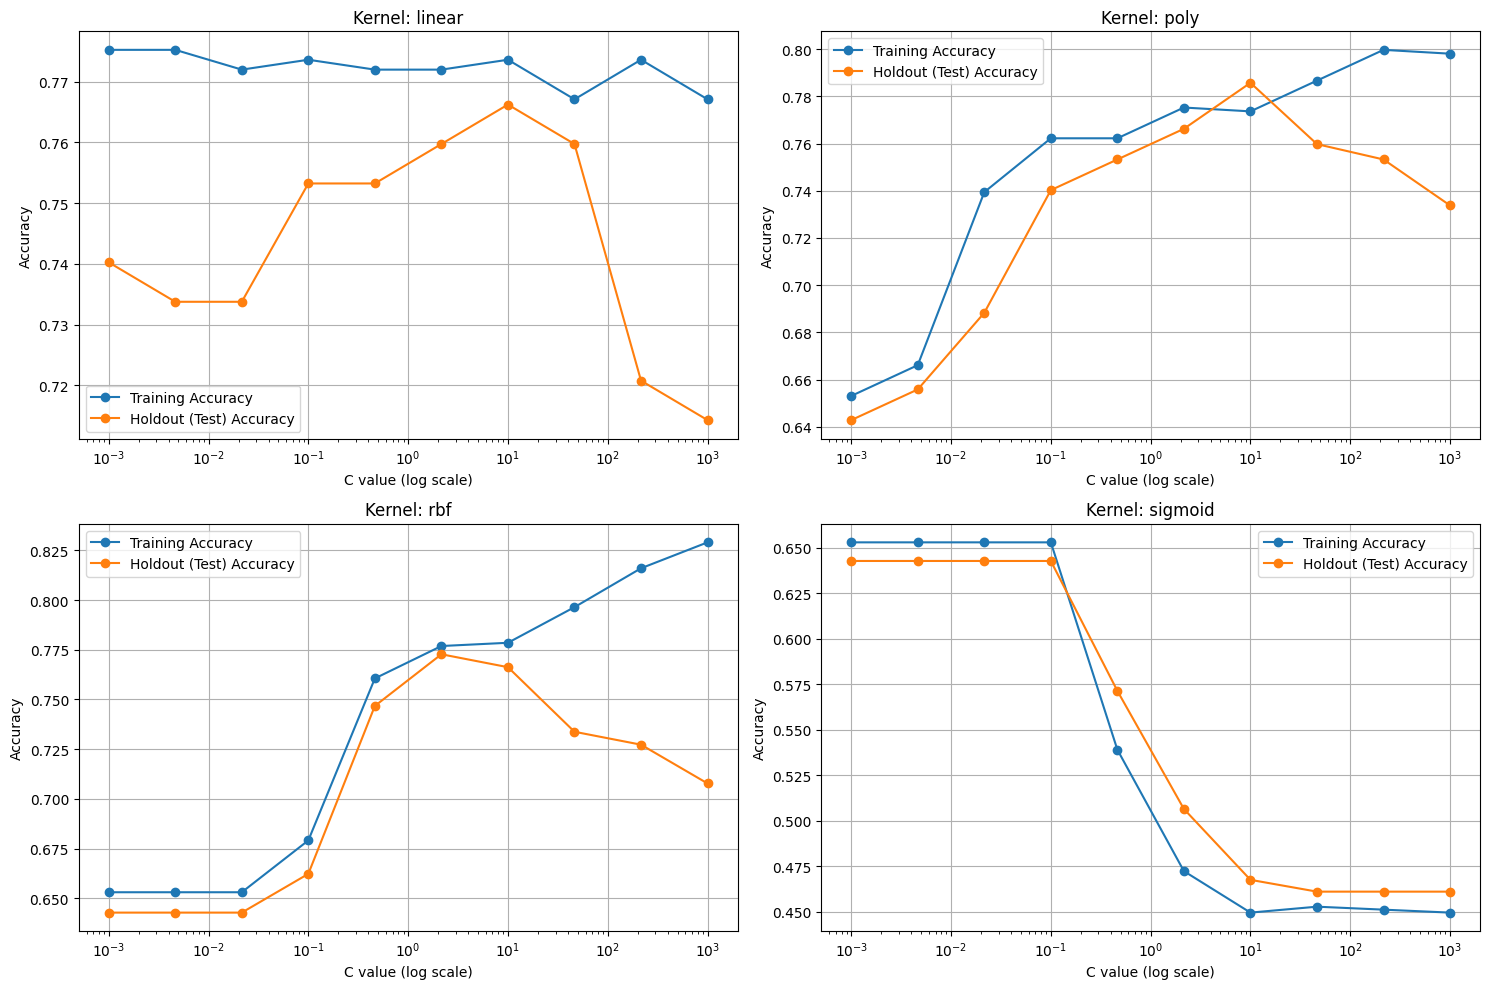

In [18]:
# Experiment with different kernel functions, for a list  of C values, and show how it influences the training and testing error

# TODO: Create a list of kernel functions to try
kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']

# TODO: Train and evaluate a model for each kernel function
train_accuracy_list = []
holdout_accuracy_list = []

for kernel in kernel_functions:
  train_accuracies = []
  holdout_accuracies = []
  
  for C in C_values:
    # TODO: train SVM
    svm = SVC(kernel=kernel, C=C)
    svm.fit(X_train, y_train)
    
    # TODO: Predict target values
    y_pred_train = svm.predict(X_train)
    y_pred_holdout = svm.predict(X_holdout)
    
    # TODO: Calculate and record accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    holdout_accuracy = accuracy_score(y_holdout, y_pred_holdout)
    
    train_accuracies.append(train_accuracy)
    holdout_accuracies.append(holdout_accuracy)
    
  train_accuracy_list.append(train_accuracies)
  holdout_accuracy_list.append(holdout_accuracies)
# TODO: Plot the training and testing error as a function of kernel and C
plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernel_functions):
    plt.subplot(2, 2, i+1)
    plt.plot(C_values, train_accuracy_list[i], label='Training Accuracy', marker='o')
    plt.plot(C_values, holdout_accuracy_list[i], label='Holdout (Test) Accuracy', marker='o')
    plt.xscale('log')
    plt.xlabel('C value (log scale)')
    plt.ylabel('Accuracy')
    plt.title(f'Kernel: {kernel}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
